## Load and checkout data

In [1]:
# import basic libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
# load training and test sets

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
# checkout the shape of the training and the test set

print('Training set dimensions: ', train.shape)
print('Test set dimensions: ', test.shape)

Training set dimensions:  (9557, 143)
Test set dimensions:  (23856, 142)


In [4]:
# checkout basic information on the training set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
# glimpse at the training set and display all columns

pd.set_option('display.max_columns', 143)
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
# checkout a summary of the numerical features of the training set

train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

## Explore the data

In [7]:
# import viszualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

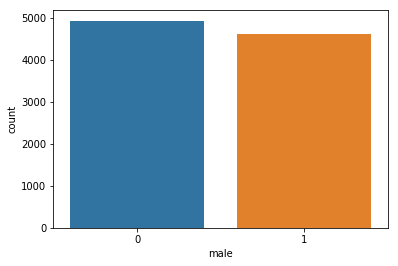

In [8]:
# count plot of the 'male' feature to see the distribution of gender in the data

sns.countplot(train['male'])
plt.show()

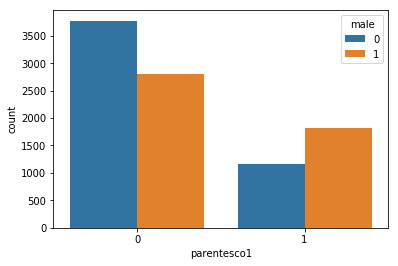

In [9]:
# count plot of the 'parentsco1' feature separated by 'male' to see the distribution of heads and non-heads of households separated by whether they are male or not

sns.countplot(train['parentesco1'], hue=train['male'])
plt.show()

In [10]:
# checkout some basic metrics of the target

train.describe().Target

count    9557.000000
mean        3.302292
std         1.009565
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Target, dtype: float64

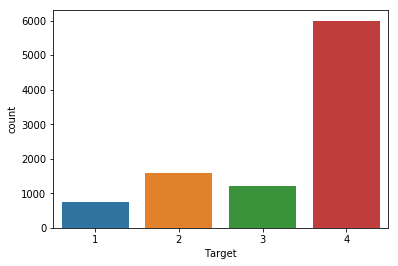

In [11]:
# count plot of the target

sns.countplot(train['Target'])
plt.show()

## Preprocess data for modeling

- current approach: train and test models on individual level data only for heads of households
- alternative approach to try later: train and test models on household level data and use only predictions for heads of households

In [12]:
# extract the target from the training set into a separate object

y_train = train['Target'][train['parentesco1'] == 1]

In [13]:
# add a new feature to the training and the test set to be able to distingush them after combining the into one dataframe

train['is_train'] = 1
test['is_train'] = 0

In [14]:
# concat training and test sets for preprocessing

train_test = pd.concat([train, test], sort=True)

In [15]:
# identify top 10 columns with missing values

train_test.isnull().sum().sort_values(ascending=False).head(10)

rez_esc          27581
v18q1            25468
v2a1             24263
Target           23856
SQBmeaned           36
meaneduc            36
SQBdependency        0
estadocivil7         0
eviv3                0
eviv2                0
dtype: int64

In [16]:
# get names of columns that contain any missing value

cols_with_missing_values = [col for col in train_test.columns if train_test[col].isnull().any()]
cols_with_missing_values

['SQBmeaned', 'Target', 'meaneduc', 'rez_esc', 'v18q1', 'v2a1']

In [17]:
# drop columns that contain any missing values

train_test = train_test.drop(cols_with_missing_values, axis=1)

In [18]:
# check whether dropping has been successful

train_test.isnull().sum().sort_values(ascending=False).head(10)

v18q            0
estadocivil7    0
eviv3           0
eviv2           0
eviv1           0
etecho3         0
etecho2         0
etecho1         0
estadocivil6    0
epared2         0
dtype: int64

In [19]:
# identify categorical variables

train_test.dtypes.sort_values(ascending=False).head(10)

Id                  object
idhogar             object
edjefa              object
edjefe              object
dependency          object
SQBovercrowding    float64
overcrowding       float64
SQBdependency      float64
estadocivil4         int64
estadocivil5         int64
dtype: object

In [20]:
# one-hot-encode categorical variables that will be used in modeling later

train_test_enc = pd.get_dummies(train_test, columns=['edjefa', 'edjefe', 'dependency'], drop_first=True)

In [21]:
# drop 'Id' and 'idhogar' columns because they don't concey any useful information for modeling

train_test_enc = train_test_enc.drop(['Id', 'idhogar'], axis=1)

In [22]:
# features for training

X_train = train_test_enc[(train_test_enc['parentesco1'] == 1) & (train_test_enc['is_train'] == 1)]

In [23]:
# features for testing

X_test = train_test_enc[(train_test_enc['parentesco1'] == 1) & (train_test_enc['is_train'] == 0)]

In [24]:
# make sure that X_train and X_test have the same number of columns

print('X_train dimensions: ', X_train.shape)
print('X_test dimensions: ', X_test.shape)

X_train dimensions:  (2973, 212)
X_test dimensions:  (7334, 212)


## Modeling

In [25]:
# import linear models

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import non-linear models

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [26]:
# set up test harness

from sklearn.model_selection import KFold,cross_val_score

seed = 42
scoring = 'accuracy'

In [27]:
# spot check algorithms and pick model with highest average cv accuracy

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn on the training data using 10-fold cross-validation

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.676654 (0.086132)


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/conda/lib/python3.6/site-packages/sklearn

LDA: 0.660164 (0.088784)
CART: 0.553565 (0.079289)
NB: 0.500020 (0.131244)
KNN: 0.580796 (0.078947)
SVM: 0.642332 (0.094616)
RF: 0.647048 (0.095846)


In [28]:
# use Logistic Regression for fitting the training set

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
# make predictions on the test set using the lr model

predictions = lr.predict(X_test)

## Prepare submission

In [30]:
# load the sample submission file and check out its first few rows

sample_sub = pd.read_csv('../input/sample_submission.csv')
sample_sub.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [31]:
# drop the 'Target' column and make sure the dropping was successful

sample_sub = sample_sub.drop('Target', axis=1)
sample_sub.head()

,Id
0,ID_2f6873615
1,ID_1c78846d2
2,ID_e5442cf6a
3,ID_a8db26a79
4,ID_a62966799


In [32]:
# get the relevant ids for the test set, put them into a dataframe and checkout its head

X_test_ids = train_test[(train_test['parentesco1'] == 1) & (train_test['is_train'] == 0)]['Id']
X_test_ids_df = pd.DataFrame(X_test_ids)
X_test_ids_df.head()

,Id
2,ID_e5442cf6a
3,ID_a8db26a79
4,ID_a62966799
6,ID_3c5f4bd51
8,ID_472fa82da


In [33]:
# add the predictions to the dataframe with the test set ids and check out its head

X_test_ids_df['Target'] = predictions
X_test_ids_df.head()

,Id,Target
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4
6,ID_3c5f4bd51,4
8,ID_472fa82da,4


In [34]:
# create the final submission file by merging the sample submission file with the test set ids and their predictions
# replace the missing values for the ids that are non-heads of households with 4 as they are not scored anyway

submission = pd.merge(sample_sub, X_test_ids_df, how='left', on=['Id'])
submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
submission.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [35]:
# write final submission file to csv

submission.to_csv('submission_lr.csv', index = False)